In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from imblearn.over_sampling import SMOTE
from collections import Counter

# for spliting data into train and test
from sklearn.model_selection import train_test_split, GridSearchCV

# load method
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# load model method
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Load Data

In [2]:
wine_data = pd.read_csv("data/wine/winequality-red.csv", sep=";")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Data Visualization

## Quality Values Counting

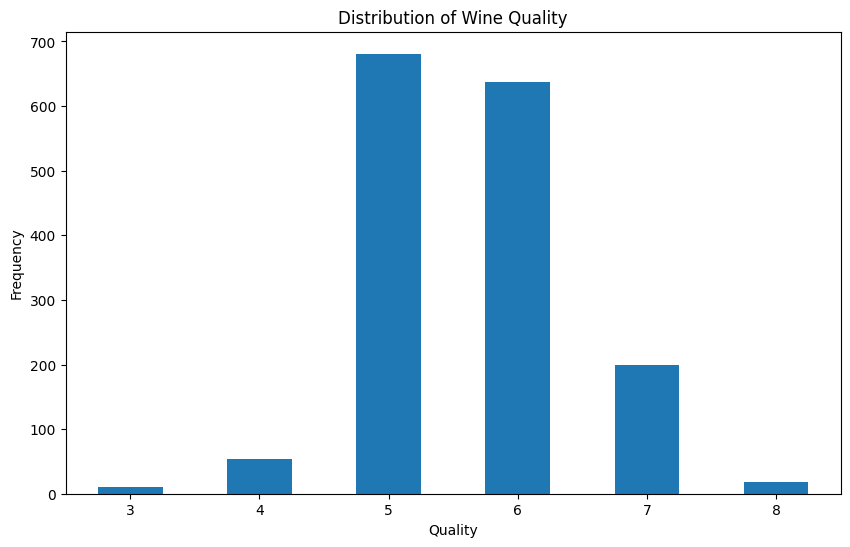

In [4]:
quality_counts = wine_data['quality'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
quality_counts.plot(kind='bar')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

## Correlation Heatmap

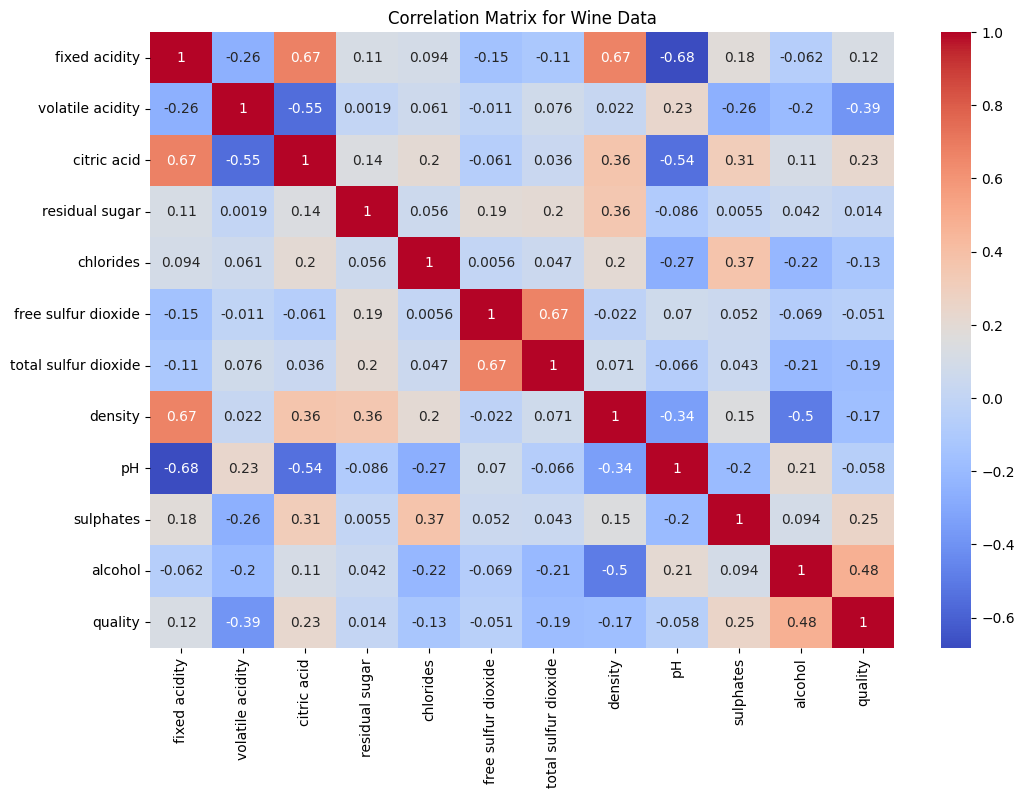

In [5]:
correlation_matrix = wine_data.corr()

# 상관관계 행렬을 이용한 히트맵 생성
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Wine Data')
plt.show()

# Split Data

In [6]:
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"============= train set =============\nX_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"============= test  set =============\nX_test:  {X_test.shape}, y_test:  {y_test.shape}\n=====================================")

============= train set =============
X_train: (1119, 11), y_train: (1119,)
============= test  set =============
X_test:  (480, 11), y_test:  (480,)


## SMOTE - Upsampling

In [7]:
print("Original dataset shape:", Counter(y_train))

Original dataset shape: Counter({5: 486, 6: 438, 7: 138, 4: 36, 8: 12, 3: 9})


In [8]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [9]:
print("Resampled dataset shape:", Counter(y_res))

Resampled dataset shape: Counter({7: 486, 5: 486, 6: 486, 3: 486, 8: 486, 4: 486})


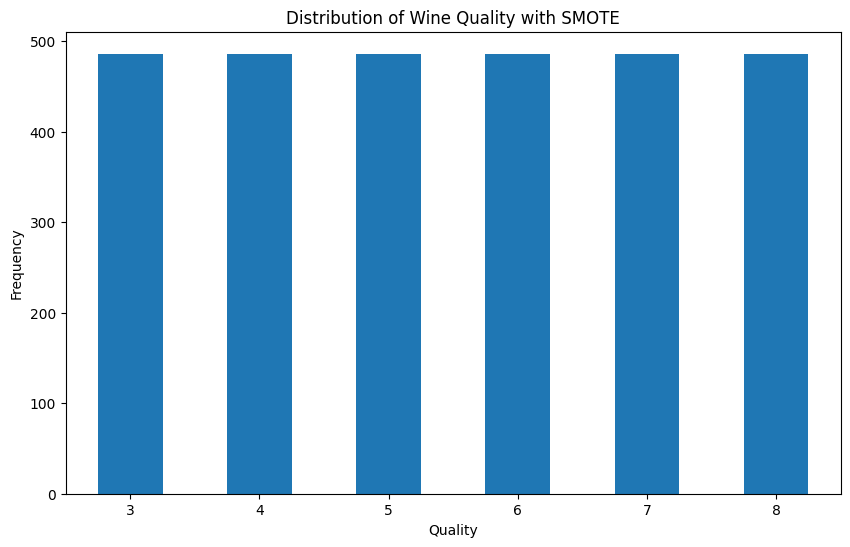

In [10]:
quality_counts = y_res.value_counts().sort_index()
plt.figure(figsize=(10, 6))
quality_counts.plot(kind='bar')
plt.title('Distribution of Wine Quality with SMOTE')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Train Models

## Linear Regression

In [11]:
# =================train model================
# train
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# predict
linear_y_train = model_linear.predict(X_train)
linear_y_test = model_linear.predict(X_test)
# ============================================

# ====================MSE=====================
linear_train_mse = mean_squared_error(y_train, linear_y_train)
linear_test_mse = mean_squared_error(y_test, linear_y_test)
# ============================================
print(f"MSE of Linear train : {round(linear_train_mse, 5)}")
print(f"MSE of Linear test  : {round(linear_test_mse, 5)}")

MSE of Linear train : 0.42079
MSE of Linear test  : 0.41123


### Upsampled

In [12]:
# =================train model================
# train
model_linear = LinearRegression()
model_linear.fit(X_res, y_res)

# predict
linear_y_train = model_linear.predict(X_res)
linear_y_test = model_linear.predict(X_test)
# ============================================

# ====================MSE=====================
linear_train_mse = mean_squared_error(y_res, linear_y_train)
linear_test_mse = mean_squared_error(y_test, linear_y_test)
# ============================================
print(f"MSE of Linear train : {round(linear_train_mse, 5)}")
print(f"MSE of Linear test  : {round(linear_test_mse, 5)}")

MSE of Linear train : 0.82391
MSE of Linear test  : 0.80227


## Logistic Regression

In [13]:
# =================train model================
# train
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

# predict
logistic_y_train = model_logistic.predict(X_train)
logistic_y_test = model_logistic.predict(X_test)
# ============================================

# ====================MSE=====================
logistic_train_mse = mean_squared_error(y_train, logistic_y_train)
logistic_test_mse = mean_squared_error(y_test, logistic_y_test)
# ============================================
print(f"MSE of Logistic train : {round(logistic_train_mse, 5)}")
print(f"MSE of Logistic test  : {round(logistic_test_mse, 5)}")

MSE of Logistic train : 0.53977
MSE of Logistic test  : 0.55833


### Upsampled

In [14]:
# =================train model================
# train
model_logistic = LogisticRegression()
model_logistic.fit(X_res, y_res)

# predict
logistic_y_train = model_logistic.predict(X_res)
logistic_y_test = model_logistic.predict(X_test)
# ============================================

# ====================MSE=====================
logistic_train_mse = mean_squared_error(y_res, logistic_y_train)
logistic_test_mse = mean_squared_error(y_test, logistic_y_test)
# ============================================
print(f"MSE of Logistic train : {round(logistic_train_mse, 5)}")
print(f"MSE of Logistic test  : {round(logistic_test_mse, 5)}")

MSE of Logistic train : 1.3275
MSE of Logistic test  : 1.99792


## Decision Tree

In [15]:
# =================train model================
# train
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# predict
dt_y_train = dt.predict(X_train)
dt_y_test = dt.predict(X_test)

# ====================MSE=====================
dt_train_mse = mean_squared_error(y_train, dt_y_train)
dt_test_mse = mean_squared_error(y_test, dt_y_test)
# ============================================
print(f"MSE of Decision Tree train : {round(dt_train_mse, 5)}")
print(f"MSE of Decision Tree test  : {round(dt_test_mse, 5)}")

MSE of Decision Tree train : 0.0
MSE of Decision Tree test  : 0.61042


In [16]:
for t, p in zip(y_train, dt_y_train):
    print(f"true: {t}\npred: {p}\n")

true: 7
pred: 7.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 7
pred: 7.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 5
pred: 5.0

true: 7
pred: 7.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 6
pred: 6.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 6
pred: 6.0

true: 7
pred: 7.0

true: 6
pred: 6.0

true: 6
pred: 6.0

true: 7
pred: 7.0

true: 5
pred: 5.0

true: 3
pred: 3.0

true: 5
pred: 5.0

true: 8
pred: 8.0

true: 4
pred: 4.0

true: 6
pred: 6.0

true: 7
pred: 7.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 5
pred: 5.0

true: 7
pred: 7.0

true: 4
pred: 4.0

true: 7
pred: 7.0

true: 7
pred: 7.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 6
pred: 6.0

true: 5
pred: 5.0

true: 7
pred: 7.0

true: 5
pred

### Upsampled

In [17]:
# =================train model================
# train
dt = DecisionTreeRegressor()
dt.fit(X_res, y_res)

# predict
dt_y_train = dt.predict(X_res)
dt_y_test = dt.predict(X_test)

# ====================MSE=====================
dt_train_mse = mean_squared_error(y_res, dt_y_train)
dt_test_mse = mean_squared_error(y_test, dt_y_test)
# ============================================
print(f"MSE of Decision Tree train : {round(dt_train_mse, 5)}")
print(f"MSE of Decision Tree test  : {round(dt_test_mse, 5)}")

MSE of Decision Tree train : 0.0
MSE of Decision Tree test  : 0.87083


In [18]:
for t, p in zip(y_train, dt_y_train):
    print(f"true: {t}\npred: {p}\n")

true: 7
pred: 7.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 7
pred: 7.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 5
pred: 5.0

true: 7
pred: 7.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 6
pred: 6.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 6
pred: 6.0

true: 7
pred: 7.0

true: 6
pred: 6.0

true: 6
pred: 6.0

true: 7
pred: 7.0

true: 5
pred: 5.0

true: 3
pred: 3.0

true: 5
pred: 5.0

true: 8
pred: 8.0

true: 4
pred: 4.0

true: 6
pred: 6.0

true: 7
pred: 7.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 5
pred: 5.0

true: 7
pred: 7.0

true: 4
pred: 4.0

true: 7
pred: 7.0

true: 7
pred: 7.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 6
pred: 6.0

true: 5
pred: 5.0

true: 7
pred: 7.0

true: 5
pred

### pruning

In [19]:
path = dt.cost_complexity_pruning_path(X_res, y_res)

ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = np.abs(ccp_alphas) # 부동 소수점에 의한 음수값 없애기 위한 작업

In [20]:
# alpha 마다의 cost_complexity 값 구한거!
regs = []
for ccp_alpha in ccp_alphas:
    reg_dt = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    reg_dt.fit(X_res, y_res)
    regs.append(reg_dt)
    
regs = regs[:-1] # 왜..?
ccp_alphas = ccp_alphas[:-1]

node_counts = [reg.tree_.node_count for reg in regs]
depth = [reg.tree_.max_depth for reg in regs]

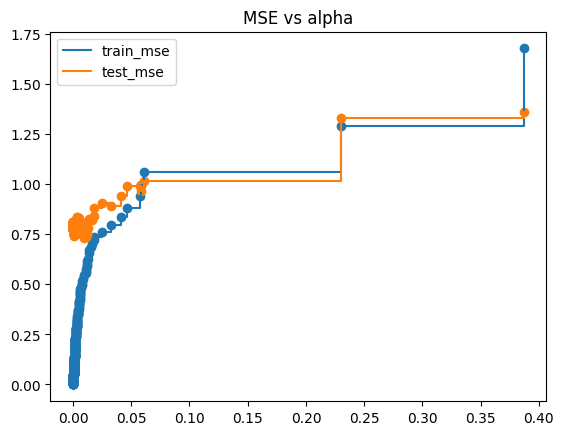

Best alpha: 0.00953


In [21]:
train_mse = []
test_mse = []
for reg in regs:
    y_train_pred = reg.predict(X_res)
    y_test_pred = reg.predict(X_test)
    train_mse.append(((y_res - y_train_pred)**2).mean())
    test_mse.append(((y_test - y_test_pred)**2).mean())

plt.scatter(ccp_alphas,train_mse)
plt.scatter(ccp_alphas,test_mse)
plt.plot(ccp_alphas,train_mse,label='train_mse',drawstyle="steps-post")
plt.plot(ccp_alphas,test_mse,label='test_mse',drawstyle="steps-post")
plt.legend()
plt.title('MSE vs alpha')
plt.show()

best_alpha = round(ccp_alphas[test_mse.index(min(test_mse))], 5)
print(f"Best alpha: {best_alpha}")

In [22]:
best_reg_dt = DecisionTreeRegressor(random_state=42, ccp_alpha=best_alpha)
best_reg_dt.fit(X_res, y_res)

reg_y_train = best_reg_dt.predict(X_res)
reg_y_test = best_reg_dt.predict(X_test)

best_reg_train_mse = ((y_res - reg_y_train)**2).mean()
best_reg_test_mse = ((y_test - reg_y_test)**2).mean()

print(f"MSE of the Best Regression Tree train : {round(best_reg_train_mse, 5)}")
print(f"MSE of the Best Regression Tree test  : {round(best_reg_test_mse, 5)}")

MSE of the Best Regression Tree train : 0.5259
MSE of the Best Regression Tree test  : 0.76844


## Random Forest

In [23]:
# =================train model================
# train
rf = RandomForestRegressor(random_state=42) # defalut n_estimators=100 / defalut max_features=1.0 /default max_depth=None
rf.fit(X_train, y_train)

# predict
rf_y_train = rf.predict(X_train)
rf_y_test = rf.predict(X_test)

# ====================MSE=====================
rf_train_mse = mean_squared_error(y_train, rf_y_train)
rf_test_mse = mean_squared_error(y_test, rf_y_test)
# ============================================
print(f"MSE of Random Forest train : {round(rf_train_mse, 5)}")
print(f"MSE of Random Forest test  : {round(rf_test_mse, 5)}")

MSE of Random Forest train : 0.04852
MSE of Random Forest test  : 0.34826


### Upsampled

In [24]:
# =================train model================
# train
rf = RandomForestRegressor(random_state=42) # defalut n_estimators=100 / defalut max_features=1.0 /default max_depth=None
rf.fit(X_res, y_res)

# predict
rf_y_train = rf.predict(X_res)
rf_y_test = rf.predict(X_test)

# ====================MSE=====================
rf_train_mse = mean_squared_error(y_res, rf_y_train)
rf_test_mse = mean_squared_error(y_test, rf_y_test)
# ============================================
print(f"MSE of Random Forest train : {round(rf_train_mse, 5)}")
print(f"MSE of Random Forest test  : {round(rf_test_mse, 5)}")

MSE of Random Forest train : 0.02526
MSE of Random Forest test  : 0.42104


### Hyper-parameter Tuning

In [25]:
# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None]
}

# 그리드 서치 객체 생성 및 학습
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_res, y_res)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [26]:
# 최적의 하이퍼파라미터와 오류 확인
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 200}
Best CV Score: -0.5563648095438098


### Best Models

In [27]:
# =================train model================
# train
rf = RandomForestRegressor(random_state=42, **grid_search.best_params_)
rf.fit(X_res, y_res)

# predict
rf_y_train = rf.predict(X_res)
rf_y_test = rf.predict(X_test)

# ====================MSE=====================
rf_train_mse = mean_squared_error(y_res, rf_y_train)
rf_test_mse = mean_squared_error(y_test, rf_y_test)
# ============================================
print(f"MSE of Random Forest train : {round(rf_train_mse, 5)}")
print(f"MSE of Random Forest test  : {round(rf_test_mse, 5)}")

MSE of Random Forest train : 0.02242
MSE of Random Forest test  : 0.366


## AdaBoosting

In [28]:
# =================train model================
# train
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

# predict
ada_y_train = ada.predict(X_train)
ada_y_test = ada.predict(X_test)

# ====================MSE=====================
ada_train_mse = mean_squared_error(y_train, ada_y_train)
ada_test_mse = mean_squared_error(y_test, ada_y_test)
# ============================================
print(f"MSE of AdaBoosting train : {round(ada_train_mse, 5)}")
print(f"MSE of AdaBoosting test  : {round(ada_test_mse, 5)}")

MSE of AdaBoosting train : 0.0
MSE of AdaBoosting test  : 0.38958


In [29]:
for t, p in zip(y_train, ada_y_train):
    print(f"true: {t}\npred: {p}\n")

true: 7
pred: 7.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 7
pred: 7.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 5
pred: 5.0

true: 7
pred: 7.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 6
pred: 6.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 6
pred: 6.0

true: 7
pred: 7.0

true: 6
pred: 6.0

true: 6
pred: 6.0

true: 7
pred: 7.0

true: 5
pred: 5.0

true: 3
pred: 3.0

true: 5
pred: 5.0

true: 8
pred: 8.0

true: 4
pred: 4.0

true: 6
pred: 6.0

true: 7
pred: 7.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 5
pred: 5.0

true: 7
pred: 7.0

true: 4
pred: 4.0

true: 7
pred: 7.0

true: 7
pred: 7.0

true: 5
pred: 5.0

true: 5
pred: 5.0

true: 6
pred: 6.0

true: 6
pred: 6.0

true: 5
pred: 5.0

true: 7
pred: 7.0

true: 5
pred

### Upsampled

In [30]:
# =================train model================
# train
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
ada.fit(X_res, y_res)

# predict
ada_y_train = ada.predict(X_res)
ada_y_test = ada.predict(X_test)

# ====================MSE=====================
ada_train_mse = mean_squared_error(y_res, ada_y_train)
ada_test_mse = mean_squared_error(y_test, ada_y_test)
# ============================================
print(f"MSE of AdaBoosting train : {round(ada_train_mse, 5)}")
print(f"MSE of AdaBoosting test  : {round(ada_test_mse, 5)}")

MSE of AdaBoosting train : 0.0
MSE of AdaBoosting test  : 0.45625


### pruning

In [31]:
# =================train model================
# train
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=42, ccp_alpha=best_alpha), n_estimators=100, random_state=42)
ada.fit(X_res, y_res)

# predict
ada_y_train = ada.predict(X_res)
ada_y_test = ada.predict(X_test)

# ====================MSE=====================
ada_train_mse = mean_squared_error(y_res, ada_y_train)
ada_test_mse = mean_squared_error(y_test, ada_y_test)
# ============================================
print(f"MSE of AdaBoosting train : {round(ada_train_mse, 5)}")
print(f"MSE of AdaBoosting test  : {round(ada_test_mse, 5)}")

MSE of AdaBoosting train : 0.19438
MSE of AdaBoosting test  : 0.39214


## Gradient Boosting

In [32]:
# =================train model================
# train
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

# predict
gb_y_train = gb.predict(X_train)
gb_y_test = gb.predict(X_test)

# ====================MSE=====================
gb_train_mse = mean_squared_error(y_train, gb_y_train)
gb_test_mse = mean_squared_error(y_test, gb_y_test)
# ============================================
print(f"MSE of Gradient Boosting train : {round(gb_train_mse, 5)}")
print(f"MSE of Gradient Boosting test  : {round(gb_test_mse, 5)}")

MSE of Gradient Boosting train : 0.2214
MSE of Gradient Boosting test  : 0.38343


### Upsampled

In [33]:
# =================train model================
# train
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_res, y_res)

# predict
gb_y_train = gb.predict(X_res)
gb_y_test = gb.predict(X_test)

# ====================MSE=====================
gb_train_mse = mean_squared_error(y_res, gb_y_train)
gb_test_mse = mean_squared_error(y_test, gb_y_test)
# ============================================
print(f"MSE of Gradient Boosting train : {round(gb_train_mse, 5)}")
print(f"MSE of Gradient Boosting test  : {round(gb_test_mse, 5)}")

MSE of Gradient Boosting train : 0.2834
MSE of Gradient Boosting test  : 0.57589


## Linear SVM Regressor

In [34]:
# =================train model================
# train
linear_svm = LinearSVR(random_state=42) # defalut C=1.0
linear_svm.fit(X_train, y_train)

# predict
linear_svm_y_train = linear_svm.predict(X_train)
linear_svm_y_test = linear_svm.predict(X_test)

# ====================MSE=====================
linear_svm_train_mse = mean_squared_error(y_train, linear_svm_y_train)
linear_svm_test_mse = mean_squared_error(y_test, linear_svm_y_test)
# ============================================
print(f"MSE of Linear SVM train : {round(linear_svm_train_mse, 5)}")
print(f"MSE of Linear SVM test  : {round(linear_svm_test_mse, 5)}")

MSE of Linear SVM train : 0.74479
MSE of Linear SVM test  : 0.69919


### Upsampled

In [35]:
# =================train model================
# train
linear_svm = LinearSVR(random_state=42) # defalut C=1.0
linear_svm.fit(X_res, y_res)

# predict
linear_svm_y_train = linear_svm.predict(X_res)
linear_svm_y_test = linear_svm.predict(X_test)

# ====================MSE=====================
linear_svm_train_mse = mean_squared_error(y_res, linear_svm_y_train)
linear_svm_test_mse = mean_squared_error(y_test, linear_svm_y_test)
# ============================================
print(f"MSE of Linear SVM train : {round(linear_svm_train_mse, 5)}")
print(f"MSE of Linear SVM test  : {round(linear_svm_test_mse, 5)}")

MSE of Linear SVM train : 1.8696
MSE of Linear SVM test  : 2.03735


## Kernel SVM Regressor

In [36]:
# =================train model================
# train
kernel_svm = SVR() # defalut C=1.0 / default kernel=radial / default gamma='scale'
kernel_svm.fit(X_train, y_train)

# predict
kernel_svm_y_train = kernel_svm.predict(X_train)
kernel_svm_y_test = kernel_svm.predict(X_test)

# ====================MSE=====================
kernel_svm_train_mse = mean_squared_error(y_train, kernel_svm_y_train)
kernel_svm_test_mse = mean_squared_error(y_test, kernel_svm_y_test)
# ============================================
print(f"MSE of Kernel SVM train : {round(kernel_svm_train_mse, 5)}")
print(f"MSE of Kernel SVM test  : {round(kernel_svm_test_mse, 5)}")

MSE of Kernel SVM train : 0.54224
MSE of Kernel SVM test  : 0.52714


### Upsampled

In [37]:
# =================train model================
# train
kernel_svm = SVR() # defalut C=1.0 / default kernel=radial / default gamma='scale' / default epsilon=0.1
kernel_svm.fit(X_res, y_res)

# predict
kernel_svm_y_train = kernel_svm.predict(X_res)
kernel_svm_y_test = kernel_svm.predict(X_test)

# ====================MSE=====================
kernel_svm_train_mse = mean_squared_error(y_res, kernel_svm_y_train)
kernel_svm_test_mse = mean_squared_error(y_test, kernel_svm_y_test)
# ============================================
print(f"MSE of Kernel SVM train : {round(kernel_svm_train_mse, 5)}")
print(f"MSE of Kernel SVM test  : {round(kernel_svm_test_mse, 5)}")

MSE of Kernel SVM train : 1.45267
MSE of Kernel SVM test  : 0.67366


### Hyper-parameter Tuning

In [38]:
# 하이퍼파라미터 그리드 정의
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# 그리드 서치 객체 생성 및 학습
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_res, y_res)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ...................C=0.1, epsilon=0.01, gamma=scale; total time=   0.1s
[CV] END ...................C=0.1, epsilon=0.01, gamma=scale; total time=   0.1s
[CV] END ...................C=0.1, epsilon=0.01, gamma=scale; total time=   0.1s
[CV] END ...................C=0.1, epsilon=0.01, gamma=scale; total time=   0.1s
[CV] END ...................C=0.1, epsilon=0.01, gamma=scale; total time=   0.1s
[CV] END ....................C=0.1, epsilon=0.01, gamma=auto; total time=   0.2s
[CV] END ....................C=0.1, epsilon=0.01, gamma=auto; total time=   0.2s
[CV] END ....................C=0.1, epsilon=0.01, gamma=auto; total time=   0.2s
[CV] END ....................C=0.1, epsilon=0.01, gamma=auto; total time=   0.2s
[CV] END ....................C=0.1, epsilon=0.01, gamma=auto; total time=   0.2s
[CV] END ....................C=0.1, epsilon=0.1, gamma=scale; total time=   0.1s
[CV] END ....................C=0.1, epsilon=0.1

[CV] END .......................C=10, epsilon=1, gamma=scale; total time=   0.1s
[CV] END .......................C=10, epsilon=1, gamma=scale; total time=   0.1s
[CV] END ........................C=10, epsilon=1, gamma=auto; total time=   0.1s
[CV] END ........................C=10, epsilon=1, gamma=auto; total time=   0.1s
[CV] END ........................C=10, epsilon=1, gamma=auto; total time=   0.1s
[CV] END ........................C=10, epsilon=1, gamma=auto; total time=   0.1s
[CV] END ........................C=10, epsilon=1, gamma=auto; total time=   0.1s
[CV] END ......................C=10, epsilon=10, gamma=scale; total time=   0.0s
[CV] END ......................C=10, epsilon=10, gamma=scale; total time=   0.0s
[CV] END ......................C=10, epsilon=10, gamma=scale; total time=   0.0s
[CV] END ......................C=10, epsilon=10, gamma=scale; total time=   0.0s
[CV] END ......................C=10, epsilon=10, gamma=scale; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1, 10],
                         'gamma': ['scale', 'auto']},
             scoring='neg_mean_squared_error', verbose=2)

In [39]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'C': 10, 'epsilon': 0.1, 'gamma': 'auto'}
Best CV Score: -0.9688376844520507


### Best Model

In [40]:
# =================train model================
# train
kernel_svm = SVR(**grid_search.best_params_) # defalut C=1.0 / default kernel=radial / default gamma='scale'
kernel_svm.fit(X_res, y_res)

# predict
kernel_svm_y_train = kernel_svm.predict(X_res)
kernel_svm_y_test = kernel_svm.predict(X_test)

# ====================MSE=====================
kernel_svm_train_mse = mean_squared_error(y_res, kernel_svm_y_train)
kernel_svm_test_mse = mean_squared_error(y_test, kernel_svm_y_test)
# ============================================
print(f"MSE of Kernel SVM train : {round(kernel_svm_train_mse, 5)}")
print(f"MSE of Kernel SVM test  : {round(kernel_svm_test_mse, 5)}")

MSE of Kernel SVM train : 0.08884
MSE of Kernel SVM test  : 0.80322
